# Image Preparation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = '/content/drive/MyDrive/Plant_Doctor/SplitData/train'
valid_path = '/content/drive/MyDrive/Plant_Doctor/SplitData/val'
test_path = '/content/drive/MyDrive/Plant_Doctor/SplitData/test'

In [ ]:
classes_dir = ["apple", "bellpepper", "grape", 'orange', 'peach', 'raspberry','strawberry','tomato'] #total labels

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=classes_dir, batch_size=25)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=classes_dir, batch_size=5)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=classes_dir, batch_size=5, shuffle=False)

Found 2400 images belonging to 8 classes.
Found 118 images belonging to 8 classes.
Found 120 images belonging to 8 classes.


##Visualizing The Data

In [ ]:
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.7/dist-packages/PIL/Image.py
/usr/local/lib/python3.7/dist-packages/PIL/Image.py


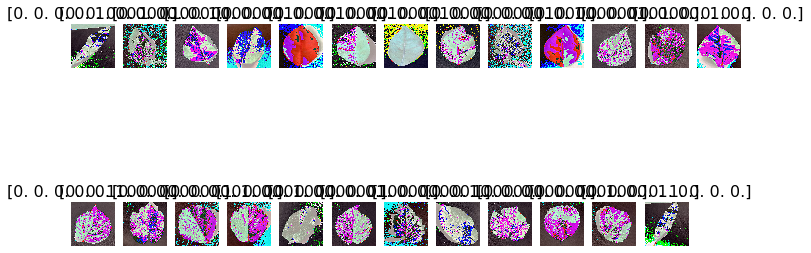

In [ ]:
import sys
from PIL import Image
sys.modules['Image'] = Image 
print(Image.__file__)
import Image
print(Image.__file__)

test_imgs, test_lables = next(train_batches)
plots(test_imgs, titles=test_lables, rows=2)

# Build And Train A Convolutional Neural Network With TensorFlow's Keras API

In [ ]:
#import vgg16 model
vgg16_model = keras.applications.vgg16.VGG16()
# vgg16_model.summary()

In [ ]:
#create a new model that will obtain the same layers as the vgg16 model

model = Sequential()
for i in range(0, len(vgg16_model.layers)-1):
    layer = vgg16_model.layers[i]
    model.add(layer)
# model.summary()

In [ ]:
for layer in model.layers:
    layer.trainable = False 
model.add(Dense(8, activation='softmax'))

In [ ]:
# model.summary()

##Training the CNN

In [ ]:
model.compile(Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# num_epochs = 10
model.fit(train_batches, steps_per_epoch=12, #did steps 8, 12
                   validation_data=valid_batches, validation_steps=4,epochs=120) #did 20, 25(12), 30(12), 40(lr=0.00001) -> 50 epochs ->>>skipped 80->90->110->120=96.6%->130 too much -> 125 too much STICK WITH 120

Epoch 1/120
12/12 [==============================] - 2s 154ms/step - loss: 2.4590 - accuracy: 0.2000 - val_loss: 2.3304 - val_accuracy: 0.3000
Epoch 2/120
12/12 [==============================] - 2s 135ms/step - loss: 2.3456 - accuracy: 0.2067 - val_loss: 2.7372 - val_accuracy: 0.1500
Epoch 3/120
12/12 [==============================] - 2s 136ms/step - loss: 2.1960 - accuracy: 0.2200 - val_loss: 2.5582 - val_accuracy: 0.2000
Epoch 4/120
12/12 [==============================] - 2s 136ms/step - loss: 2.0789 - accuracy: 0.2600 - val_loss: 2.1836 - val_accuracy: 0.2000
Epoch 5/120
12/12 [==============================] - 2s 139ms/step - loss: 2.0537 - accuracy: 0.2533 - val_loss: 1.9220 - val_accuracy: 0.1500
Epoch 6/120
12/12 [==============================] - 2s 137ms/step - loss: 1.9793 - accuracy: 0.2800 - val_loss: 2.0821 - val_accuracy: 0.3000
Epoch 7/120
12/12 [==============================] - 2s 140ms/step - loss: 1.9063 - accuracy: 0.3200 - val_loss: 1.7657 - val_accuracy: 0.4000

#Predictions with Keras API

In [ ]:
#Extract a batch of images and labels from test set
test_imgs, test_labels = next(test_batches) 

[[0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


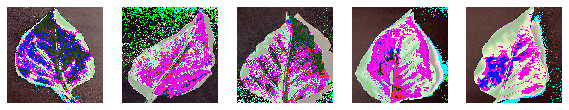

In [ ]:
plots(test_imgs)
print(test_labels)

In [ ]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [ ]:
np.round(predictions)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 

##Plotting Predictions With a Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
y_true=test_batches.classes
y_pred=np.argmax(predictions, axis=-1)

In [ ]:
test_batches.class_indices

{'apple': 0,
 'bellpepper': 1,
 'grape': 2,
 'orange': 3,
 'peach': 4,
 'raspberry': 5,
 'strawberry': 6,
 'tomato': 7}

Confusion matrix, without normalization
[[13  0  0  0  1  0  0  1]
 [ 0 15  0  0  0  0  0  0]
 [ 1  0 14  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0]
 [ 0  0  0  0 15  0  0  0]
 [ 0  0  0  0  0 14  1  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0  0 15]]
accuracy: 0.9666666666666667


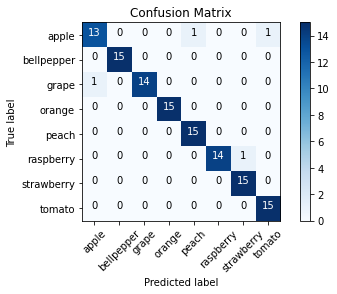

In [ ]:
from sklearn import metrics #added
cm_plot_labels = classes_dir
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
print('accuracy:', metrics.accuracy_score(y_true, y_pred))

In [ ]:
print(metrics.classification_report(y_true,y_pred,digits=3))

              precision    recall  f1-score   support

           0      0.929     0.867     0.897        15
           1      1.000     1.000     1.000        15
           2      1.000     0.933     0.966        15
           3      1.000     1.000     1.000        15
           4      0.938     1.000     0.968        15
           5      1.000     0.933     0.966        15
           6      0.938     1.000     0.968        15
           7      0.938     1.000     0.968        15

    accuracy                          0.967       120
   macro avg      0.968     0.967     0.966       120
weighted avg      0.968     0.967     0.966       120

